# PLOTAGEM DOS GRÁFICOS EM PAIR PLOT

## Anotações

## Preparando o ambiente

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
# pd.set_option('display.max_rows', None)

In [3]:
dataset = pd.read_csv('../data/feature_engineering/scaled_hle.csv')

Todas as métricas numéricas, PairGrid:

- Score
- GDP
- Social support
- HLE
- Freedom
- Generosity
- Corruption
- Positive affect
- Negative affect

## Criando intervalo HLE

O objetivo é criar um interválo válido para HLE entre 0 e 1.

In [34]:
rounded_score_hle = dataset.groupby(by='rounded_score').describe()['hle'].query('count > 1')[['min', 'max', 'mean', 'std']].reset_index()
rounded_score_hle

,rounded_score,min,max,mean,std
0,3.0,42.099998,61.700001,53.937088,4.779969
1,4.0,32.299999,67.599998,55.865641,6.399526
2,5.0,36.860001,76.820091,61.274456,6.231191
3,6.0,49.599998,77.099998,66.921283,3.979201
4,7.0,59.439999,75.900002,70.485338,2.854414
5,8.0,68.220001,74.699997,71.910906,1.308020


In [30]:
X = rounded_score_hle['rounded_score']
y = rounded_score_hle['mean']
X = np.array(X).reshape(-1, 1)
model = LinearRegression().fit(X, np.array(y))

In [37]:
to_predict = np.array([1, 2, 9, 10]).reshape(-1, 1)
model.predict(to_predict)

array([45.47947465, 49.4616178 , 77.33661978, 81.31876292])

É possível definir um intervalo aqui entre 20 e 90.

In [45]:
def min_max_scaler(min, max, x):
    X_std = (x - min) / (max - min)
    X_scaled = X_std * 1
    return X_scaled

In [47]:
dataset['scaled_hle'] = [min_max_scaler(20, 90, x) for x in dataset['hle']]

### AO LONGO DO TEMPO

(0.0, 1.0)

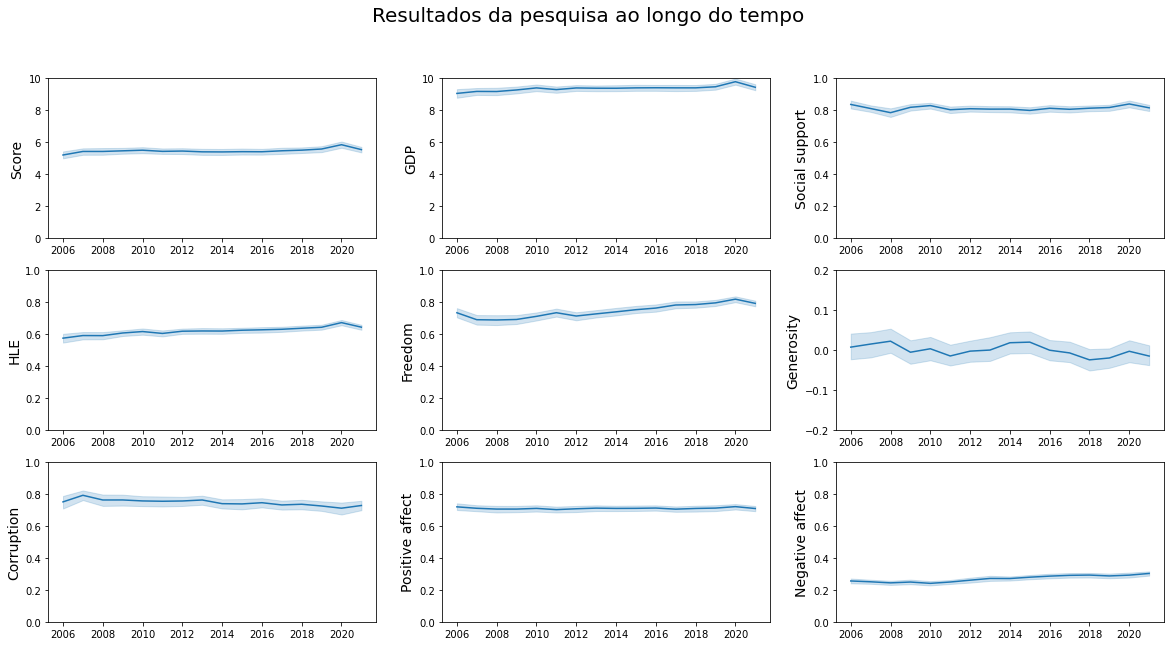

In [58]:

data_to_plot = dataset[dataset['year']>2005]

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

fig.suptitle(
  t='Resultados da pesquisa ao longo do tempo',
  fontsize=20
)

sns.lineplot(ax=axes[0, 0], data=data_to_plot, x='year', y='score')
axes[0, 0].set_ylabel('Score', fontsize=14)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylim(0, 10)

sns.lineplot(ax=axes[0, 1], data=data_to_plot, x='year', y='gdp')
axes[0, 1].set_ylabel('GDP', fontsize=14)
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylim(0, 10)

sns.lineplot(ax=axes[0, 2], data=data_to_plot, x='year', y='social_support')
axes[0, 2].set_ylabel('Social support', fontsize=14)
axes[0, 2].set_xlabel('')
axes[0, 2].set_ylim(0, 1)

sns.lineplot(ax=axes[1, 0], data=data_to_plot, x='year', y='scaled_hle')
axes[1, 0].set_ylabel('HLE', fontsize=14)
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylim(0, 1)

sns.lineplot(ax=axes[1, 1], data=data_to_plot, x='year', y='freedom')
axes[1, 1].set_ylabel('Freedom', fontsize=14)
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylim(0, 1)

sns.lineplot(ax=axes[1, 2], data=data_to_plot, x='year', y='generosity')
axes[1, 2].set_ylabel('Generosity', fontsize=14)
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylim(-0.2, 0.2)

sns.lineplot(ax=axes[2, 0], data=data_to_plot, x='year', y='corruption')
axes[2, 0].set_ylabel('Corruption', fontsize=14)
axes[2, 0].set_xlabel('')
axes[2, 0].set_ylim(0, 1)

sns.lineplot(ax=axes[2, 1], data=data_to_plot, x='year', y='positive_affect')
axes[2, 1].set_ylabel('Positive affect', fontsize=14)
axes[2, 1].set_xlabel('')
axes[2, 1].set_ylim(0, 1)

sns.lineplot(ax=axes[2, 2], data=data_to_plot, x='year', y='negative_affect')
axes[2, 2].set_ylabel('Negative affect', fontsize=14)
axes[2, 2].set_xlabel('')
axes[2, 2].set_ylim(0, 1)


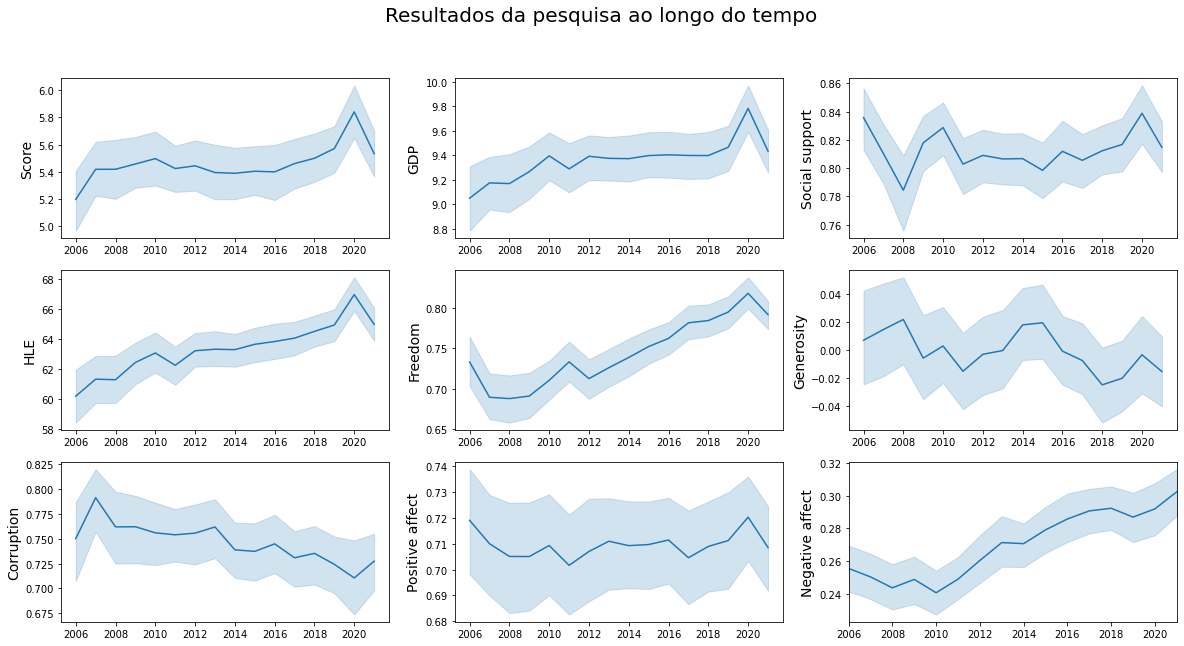

In [4]:

data_to_plot = dataset[dataset['year']>2005]

fig, axes = plt.subplots(3, 3, figsize=(20, 10))

fig.suptitle(
  t='Resultados da pesquisa ao longo do tempo',
  fontsize=20
)

sns.lineplot(ax=axes[0, 0], data=data_to_plot, x='year', y='score')
axes[0, 0].set_ylabel('Score', fontsize=14)
axes[0, 0].set_xlabel('')
plt.xlim(2006, 2021)

sns.lineplot(ax=axes[0, 1], data=data_to_plot, x='year', y='gdp')
axes[0, 1].set_ylabel('GDP', fontsize=14)
axes[0, 1].set_xlabel('')
plt.xlim(2006, 2021)

sns.lineplot(ax=axes[0, 2], data=data_to_plot, x='year', y='social_support')
axes[0, 2].set_ylabel('Social support', fontsize=14)
axes[0, 2].set_xlabel('')
plt.xlim(2006, 2021)

sns.lineplot(ax=axes[1, 0], data=data_to_plot, x='year', y='hle')
axes[1, 0].set_ylabel('HLE', fontsize=14)
axes[1, 0].set_xlabel('')
plt.xlim(2006, 2021)

sns.lineplot(ax=axes[1, 1], data=data_to_plot, x='year', y='freedom')
axes[1, 1].set_ylabel('Freedom', fontsize=14)
axes[1, 1].set_xlabel('')
plt.xlim(2006, 2021)

sns.lineplot(ax=axes[1, 2], data=data_to_plot, x='year', y='generosity')
axes[1, 2].set_ylabel('Generosity', fontsize=14)
axes[1, 2].set_xlabel('')
plt.xlim(2006, 2021)

sns.lineplot(ax=axes[2, 0], data=data_to_plot, x='year', y='corruption')
axes[2, 0].set_ylabel('Corruption', fontsize=14)
axes[2, 0].set_xlabel('')
plt.xlim(2006, 2021)

sns.lineplot(ax=axes[2, 1], data=data_to_plot, x='year', y='positive_affect')
axes[2, 1].set_ylabel('Positive affect', fontsize=14)
axes[2, 1].set_xlabel('')
plt.xlim(2006, 2021)

sns.lineplot(ax=axes[2, 2], data=data_to_plot, x='year', y='negative_affect')
axes[2, 2].set_ylabel('Negative affect', fontsize=14)
axes[2, 2].set_xlabel('')
plt.xlim(2006, 2021)

plt.show()


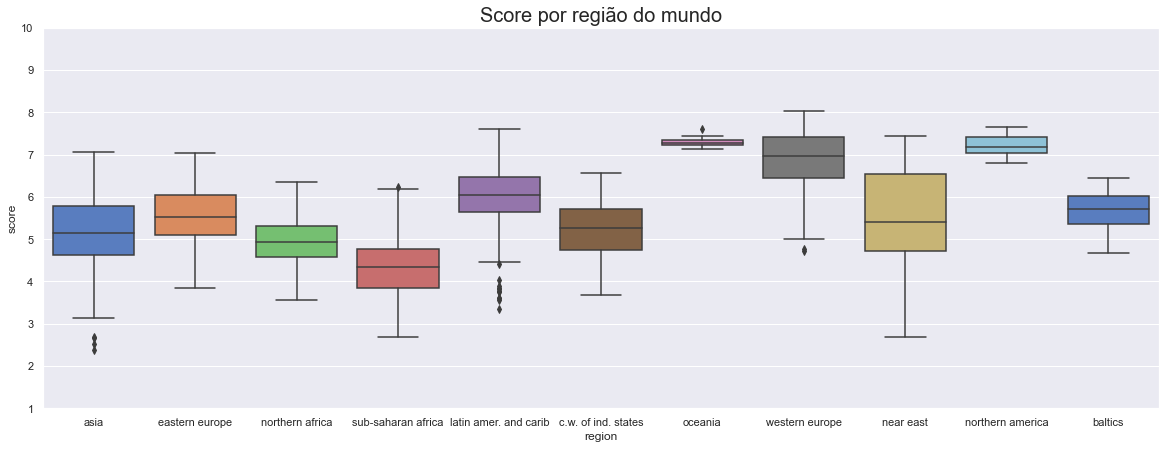

In [68]:
sns.set(rc={'figure.figsize':(20,7)})
ax = sns.boxplot(x="region", y="score", data=dataset, palette="muted")
ax.set_ylim(1, 10)
plt.title('Score por região do mundo', fontsize=20)
plt.show()

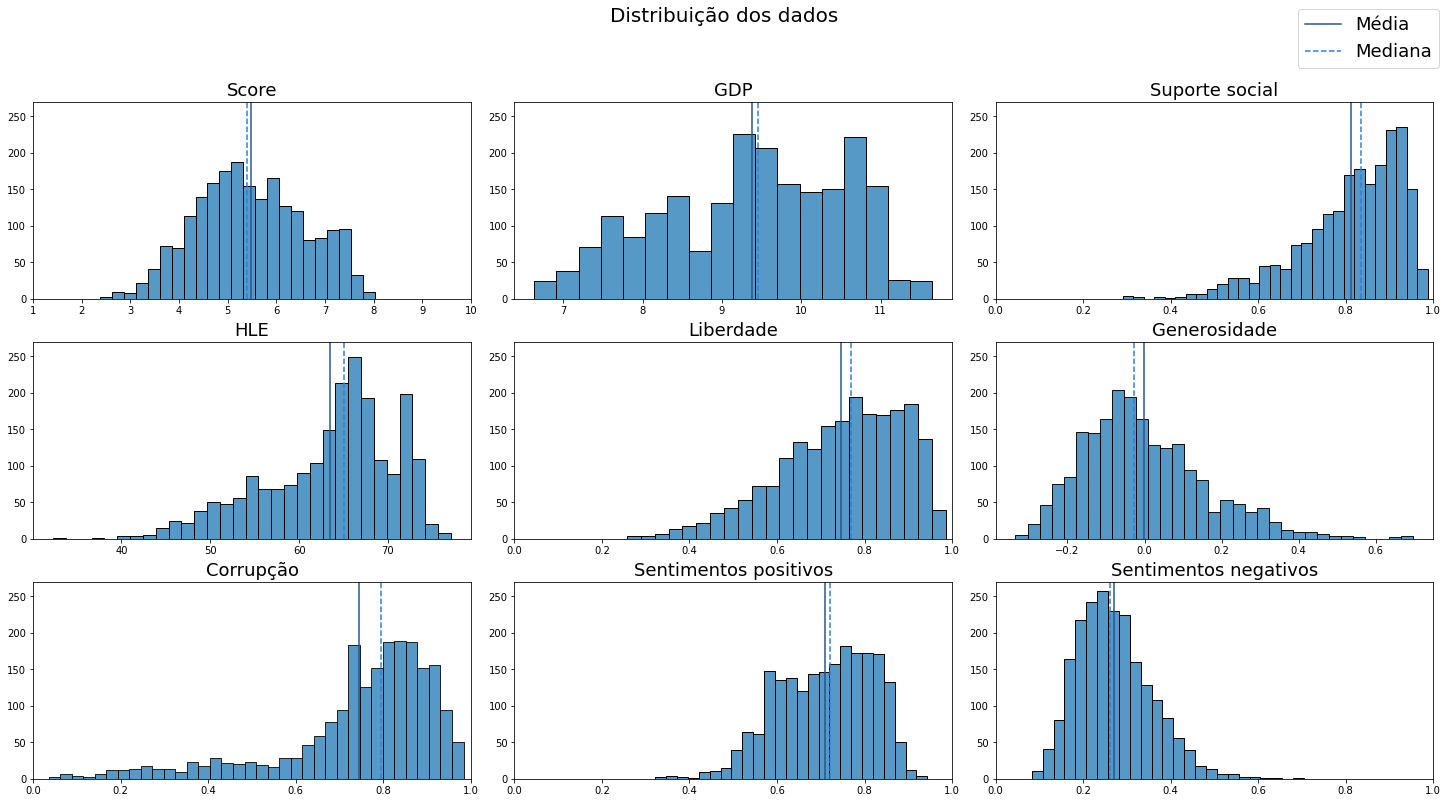

In [61]:
fig, axes = plt.subplots(3, 3, figsize=(20, 10), constrained_layout=True)

fig.suptitle(
  t='Distribuição dos dados',
  fontsize=20,
  y=1.1
)
# DISTRIBUIÇÃO DO SCORE DE FELICIDADE
ax = sns.histplot(ax=axes[0, 0], data=dataset['score'])

axes[0, 0].axvline(x=np.mean(dataset['score']), color='#24568E')
axes[0, 0].axvline(x=np.median(dataset['score']), color='#2880E4', linestyle='--')

axes[0, 0].set_ylim(0, 270)
axes[0, 0].set_xlim(1, 10)

axes[0, 0].set_title('Score', fontsize=18)
axes[0, 0].set_ylabel('')
axes[0, 0].set_xlabel('')

# DISTRIBUIÇÃO DO GDP

ax = sns.histplot(ax=axes[0, 1], data=dataset['gdp'])

axes[0, 1].axvline(x=np.mean(dataset['gdp']), color='#24568E')
axes[0, 1].axvline(x=np.median(dataset['gdp']), color='#2880E4', linestyle='--')

axes[0,1].set_ylim(0, 270)

axes[0, 1].set_title('GDP', fontsize=18)
axes[0, 1].set_ylabel('')
axes[0, 1].set_xlabel('')

# DISTRIBUIÇÃO SOCIAL SUPPORT

ax = sns.histplot(ax=axes[0,2], data=dataset['social_support'])

axes[0, 2].axvline(x=np.mean(dataset['social_support']), color='#24568E')
axes[0, 2].axvline(x=np.median(dataset['social_support']), color='#2880E4', linestyle='--')

axes[0, 2].set_ylim(0, 270)
axes[0, 2].set_xlim(0, 1)

axes[0, 2].set_title('Suporte social', fontsize=18)
axes[0, 2].set_ylabel('')
axes[0, 2].set_xlabel('')

# DISTRIBUIÇÃO HLE

ax = sns.histplot(ax=axes[1,0], data=dataset['hle'])

axes[1, 0].axvline(x=np.mean(dataset['hle']), color='#24568E')
axes[1, 0].axvline(x=np.median(dataset['hle']), color='#2880E4', linestyle='--')

axes[1, 0].set_ylim(0, 270)

axes[1, 0].set_title('HLE', fontsize=18)
axes[1, 0].set_ylabel('')
axes[1, 0].set_xlabel('')

# DISTRIBUIÇÃO FREEDOM

ax = sns.histplot(ax=axes[1,1], data=dataset['freedom'])

axes[1,1].axvline(x=np.mean(dataset['freedom']), color='#24568E')
axes[1,1].axvline(x=np.median(dataset['freedom']), color='#2880E4', linestyle='--')

axes[1, 1].set_ylim(0, 270)
axes[1, 1].set_xlim(0, 1)

axes[1, 1].set_title('Liberdade', fontsize=18)
axes[1, 1].set_ylabel('')
axes[1, 1].set_xlabel('')

# DISTRIBUIÇÃO GENEROSITY

ax = sns.histplot(ax=axes[1, 2], data=dataset['generosity'])

axes[1, 2].axvline(x=np.mean(dataset['generosity']), color='#24568E')
axes[1, 2].axvline(x=np.median(dataset['generosity']), color='#2880E4', linestyle='--')

axes[1, 2].set_ylim(0, 270)

axes[1, 2].set_title('Generosidade', fontsize=18)
axes[1, 2].set_ylabel('')
axes[1, 2].set_xlabel('')

# DISTRIBUIÇÃO CORRUPTION

ax = sns.histplot(ax=axes[2,0], data=dataset['corruption'])

axes[2,0].axvline(x=np.mean(dataset['corruption']), color='#24568E')
axes[2,0].axvline(x=np.median(dataset['corruption']), color='#2880E4', linestyle='--')

axes[2, 0].set_ylim(0, 270)
axes[2, 0].set_xlim(0, 1)

axes[2, 0].set_title('Corrupção', fontsize=18)
axes[2, 0].set_ylabel('')
axes[2, 0].set_xlabel('')

# DISTRIBUIÇÃO POSITIVE AFFECT

ax = sns.histplot(ax=axes[2,1], data=dataset['positive_affect'], bins=25)

axes[2,1].axvline(x=np.mean(dataset['positive_affect']), color='#24568E')
axes[2,1].axvline(x=np.median(dataset['positive_affect']), color='#2880E4', linestyle='--')
axes[2, 1].set_ylim(0, 270)
axes[2, 1].set_xlim(0, 1)

axes[2, 1].set_title('Sentimentos positivos', fontsize=18)
axes[2, 1].set_ylabel('')
axes[2, 1].set_xlabel('')

# DISTRIBUIÇÃO NEGATIVE AFFECT

ax = sns.histplot(ax=axes[2, 2], data=dataset['negative_affect'], bins=25)

axes[2, 2].axvline(x=np.mean(dataset['negative_affect']), color='#24568E')
axes[2, 2].axvline(x=np.median(dataset['negative_affect']), color='#2880E4', linestyle='--')

axes[2, 2].set_ylim(0, 270)
axes[2, 2].set_xlim(0, 1)

axes[2, 2].set_title('Sentimentos negativos', fontsize=18)
axes[2, 2].set_ylabel('')
axes[2, 2].set_xlabel('')

fig.legend(['Média', 'Mediana'], loc='upper right', fontsize=18)
#fig.subplots_adjust(top=0.85, right=1)

plt.show()